## Section3 Part3 Compare the Oncogene overlap with eccDNA
#### Songwen Luo

In [ ]:
library(ComplexHeatmap)
library(dplyr)
library(extrafont)
library(reshape2)
library(purrr)
library(circlize)

In [2]:
oncogenes_info <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/final_oncogenes.bed", header = FALSE, sep = "\t")
oncogenes_info$length = oncogenes_info$V3-oncogenes_info$V2+1
colnames(oncogenes_info) <- c("chr", "start", "end", "ID", "oncogene_symbol", "length")

In [3]:
oncogenes_info

chr,start,end,ID,oncogene_symbol,length
<chr>,<int>,<int>,<chr>,<chr>,<dbl>
chr1,1020119,1056118,ENSG00000188157,AGRN,36000
chr1,2227387,2310213,ENSG00000157933,SKI,82827
chr1,3069167,3438621,ENSG00000142611,PRDM16,369455
chr1,3652515,3736201,ENSG00000078900,TP73,83687
chr1,7954290,7985505,ENSG00000116288,PARK7,31216
chr1,8352396,8848921,ENSG00000142599,RERE,496526
chr1,11106534,11262556,ENSG00000198793,MTOR,156023
chr1,12166990,12209228,ENSG00000028137,TNFRSF1B,42239
chr1,12507245,12507397,ENSG00000239149,SNORA59A,153


In [4]:
##Batch1 beds

DNARCAU1_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/NGS_ecDNA_overlap_output/DNARCAU1_intersected.bed", header = FALSE, sep = "\t")
DSAT1_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/NGS_ecDNA_overlap_output/DSAT1_intersected.bed", header = FALSE, sep = "\t")

DSRT71_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/DSRT71_intersected.bed", header = FALSE, sep = "\t")
DNRT71_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/DNRT71_intersected.bed", header = FALSE, sep = "\t")
Nanopore_WGS1_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/Nanopore_WGS1_intersected.bed", header = FALSE, sep = "\t")

##Batch2 beds

DNARCAU2_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/NGS_ecDNA_overlap_output/DNARCAU2_intersected.bed", header = FALSE, sep = "\t")
DSAT2_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/NGS_ecDNA_overlap_output/DSAT2_intersected.bed", header = FALSE, sep = "\t")

DSRT72_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/DSRT72_intersected.bed", header = FALSE, sep = "\t")
DNRT72_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/DNRT72_intersected.bed", header = FALSE, sep = "\t")
Nanopore_WGS2_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/Nanopore_WGS2_intersected.bed", header = FALSE, sep = "\t")

##Batch3 beds

DNARCAU3_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/NGS_ecDNA_overlap_output/DNARCAU3_intersected.bed", header = FALSE, sep = "\t")
DSAT3_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/NGS_ecDNA_overlap_output/DSAT3_intersected.bed", header = FALSE, sep = "\t")

DSRT73_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/DSRT73_intersected.bed", header = FALSE, sep = "\t")
DNRT73_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/DNRT73_intersected.bed", header = FALSE, sep = "\t")
Nanopore_WGS3_bed_data <- read.table("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/TGS_ecDNA_overlap_output/Nanopore_WGS3_intersected.bed", header = FALSE, sep = "\t")


In [5]:
Beds_list <- list(DNARCAU1_bed_data, DNARCAU2_bed_data, DNARCAU3_bed_data, DSAT1_bed_data, DSAT2_bed_data, DSAT3_bed_data, DSRT71_bed_data, DSRT72_bed_data, DSRT73_bed_data, DNRT71_bed_data, DNRT72_bed_data, DNRT73_bed_data, Nanopore_WGS1_bed_data, Nanopore_WGS2_bed_data, Nanopore_WGS3_bed_data)

In [6]:
# 初始化一个新的列表来存储提取后的DataFrame
extracted_beds <- list()

# 循环遍历每个DataFrame，提取特定列
for (i in seq_along(Beds_list)) {
  extracted_beds[[i]] <- Beds_list[[i]][, c(1, 2, 3, 4, 16, 17, 18)]
  colnames(extracted_beds[[i]])<- c("chr", "start", "end", "ecc_ID", "ID", "oncogene_symbol", "overlap_length")
  extracted_beds[[i]] <- extracted_beds[[i]] %>% distinct(ecc_ID, oncogene_symbol, .keep_all = TRUE)
  
# 对前三个DataFrame添加新列
  if (i <= 3) {
    extracted_beds[[i]]$condition <- sprintf("DNARCAU%d", i)
  } else if (i >= 4 && i <= 6) {
    extracted_beds[[i]]$condition <- sprintf("DSAT%d", i-3)
  } else if (i >= 7 && i <= 9){
    extracted_beds[[i]]$condition <- sprintf("DSRT7%d", i-6)
  } else if (i >= 10 && i <= 12){
    extracted_beds[[i]]$condition <- sprintf("DNRT7%d", i-9)
  } else {
    extracted_beds[[i]]$condition <- sprintf("Nanopore_WGS%d", i-12)
  }
}

In [7]:
process_group <- function(data) {
  # 按 start 排序
  data <- data[order(data$start), ]
  
  i <- 1
  while(i < nrow(data)) {
    if(data$start[i+1] <= data$end[i]) {
      # 合并条件满足
      new_start <- data$start[i]
      new_end <- max(data$end[i], data$end[i+1])
      # 替换第一行并删除第二行
      data$start[i] <- new_start
      data$end[i] <- new_end
      data <- data[-(i + 1), ]
    } else {
      i <- i + 1
    }
  }
  return(data)
}

In [8]:
processed_list <- lapply(extracted_beds, function(df) {
  df %>%
    group_by(oncogene_symbol) %>%
    group_modify(~ process_group(.x)) %>%
    ungroup()
})

In [9]:
# 使用lapply处理每个DataFrame
processed_beds <- lapply(processed_list, function(df2) {
  # Join df1 to each df2
  temp_df <- merge(df2, oncogenes_info, by = "oncogene_symbol")
  
  # Calculate the new column 'NewValue'
  temp_df$overlap_propotion <- with(temp_df, temp_df$overlap_length / temp_df$length)
  
  # Optional: retain only necessary columns, or reorder them as needed
  #temp_df <- temp_df[c("Key", "Value.df2", "NewValue")]
  
  # Return the modified DataFrame
  temp_df
})

# 查看处理后的列表中的DataFrame
print(processed_beds)

[[1]]
    oncogene_symbol chr.x   start.x     end.x   ecc_ID            ID.x
1              ABL1  chr9 130869663 130871626 ec149821 ENSG00000097007
2              ABL1  chr9 130885701 130886139 ec149824 ENSG00000097007
3              ATF1 chr12  50248556  55836061  ec36293 ENSG00000123268
4              BMP7 chr20  57173798  57174393  ec88455 ENSG00000101144
5              BMP7 chr20  57183744  57184994  ec88457 ENSG00000101144
6              BMP7 chr20  57205382  57206345  ec88459 ENSG00000101144
7              BMP7 chr20  57225897  57226745  ec88461 ENSG00000101144
8              BMP7 chr20  57241222  57243631  ec88465 ENSG00000101144
9              BMP7 chr20  57244603  57246597  ec89771 ENSG00000101144
10             BMP7 chr20  57250902  57251449  ec88467 ENSG00000101144
11             BMP7 chr20  57259756  57260851  ec88468 ENSG00000101144
12           CABIN1 chr22  24035245  24035613  ec95394 ENSG00000099991
13             CAV1  chr7 116537076 116538795 ec133167 ENSG00000105974


In [10]:
process_df <- function(df, index) {
  df %>%
    group_by(oncogene_symbol) %>%
    summarise(overlap_score = sum(overlap_propotion, na.rm = TRUE)) %>%
    mutate(condition = index)  # 添加索引标识列
}

In [11]:
index_list <- c("DNARCAU1", "DNARCAU2", "DNARCAU3", "DSAT1", "DSAT2", "DSAT3", "DSRT71", "DSRT72", "DSRT73", "DNRT71", "DNRT72", "DNRT73", "Nanopore_WGS1", "Nanopore_WGS2", "Nanopore_WGS3")

In [12]:
result_df_list <- map2(processed_beds, index_list, process_df)

final_df <- bind_rows(result_df_list)

In [13]:
#save(final_df, file = "/home/qukun/luosongwen/workspace/eccDNA/oncogenes/oncogene_process_final_result.RData")

In [14]:
# 使用acast将DataFrame转换为矩阵
matrix_data <- acast(final_df, oncogene_symbol ~ condition, value.var = "overlap_score")

In [15]:
matrix_data

,DNARCAU1,DNARCAU2,DNARCAU3,DNRT71,DNRT72,DNRT73,DSAT1,DSAT2,DSAT3,DSRT71,DSRT72,DSRT73,Nanopore_WGS1,Nanopore_WGS2,Nanopore_WGS3
ABL1,0.013748755,0.031608965,0.035697516,NA,0.048696130,0.01583884,0.001964108,NA,NA,0.040358693,0.014069425,0.020763425,NA,NA,NA
ACOD1,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.038700760,NA,NA,NA,NA,NA
AKAP9,NA,0.015721141,NA,0.008578915,NA,NA,NA,NA,NA,NA,NA,0.002172697,NA,NA,NA
AQP1,NA,0.083272355,0.249817064,NA,NA,NA,NA,NA,NA,0.055612469,0.106834480,NA,NA,NA,NA
ATF1,0.999982595,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AURKA,NA,NA,NA,0.287930283,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BCL11A,NA,NA,0.016469615,NA,NA,NA,NA,NA,NA,0.008552271,0.006272307,0.003165014,NA,NA,NA
BMP7,0.099101032,0.012749004,0.043416079,0.011063439,NA,0.01130861,NA,NA,NA,0.072428236,0.075135356,0.094228215,NA,NA,NA
CABIN1,0.002197828,0.013252667,0.007847681,NA,NA,NA,NA,NA,NA,NA,NA,0.001469201,NA,NA,NA
CAV1,0.064028519,0.051676016,0.070605466,NA,0.051731285,0.07060547,NA,NA,NA,0.001906762,NA,0.083593556,NA,NA,NA


In [16]:
matrix_data[is.na(matrix_data)] <- 0

In [17]:
new_columns <- matrix(0, nrow = nrow(matrix_data), ncol = 6)

expanded_mat <- cbind(matrix_data, new_columns)

In [18]:
expanded_mat

,DNARCAU1,DNARCAU2,DNARCAU3,DNRT71,DNRT72,DNRT73,DSAT1,DSAT2,DSAT3,DSRT71,⋯,DSRT73,Nanopore_WGS1,Nanopore_WGS2,Nanopore_WGS3,,,,,,
ABL1,0.013748755,0.031608965,0.035697516,0.000000000,0.048696130,0.01583884,0.001964108,0.000000000,0.000000000,0.040358693,⋯,0.020763425,0,0.0000000,0,0,0,0,0,0,0
ACOD1,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.038700760,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
AKAP9,0.000000000,0.015721141,0.000000000,0.008578915,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.002172697,0,0.0000000,0,0,0,0,0,0,0
AQP1,0.000000000,0.083272355,0.249817064,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.055612469,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
ATF1,0.999982595,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
AURKA,0.000000000,0.000000000,0.000000000,0.287930283,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
BCL11A,0.000000000,0.000000000,0.016469615,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.008552271,⋯,0.003165014,0,0.0000000,0,0,0,0,0,0,0
BMP7,0.099101032,0.012749004,0.043416079,0.011063439,0.000000000,0.01130861,0.000000000,0.000000000,0.000000000,0.072428236,⋯,0.094228215,0,0.0000000,0,0,0,0,0,0,0
CABIN1,0.002197828,0.013252667,0.007847681,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.001469201,0,0.0000000,0,0,0,0,0,0,0
CAV1,0.064028519,0.051676016,0.070605466,0.000000000,0.051731285,0.07060547,0.000000000,0.000000000,0.000000000,0.001906762,⋯,0.083593556,0,0.0000000,0,0,0,0,0,0,0


In [19]:
# 设置列名
colnames(expanded_mat) <- c("Circle-Seq-SR1", "Circle-Seq-SR2", "Circle-Seq-SR3", "Circle-Seq-LR1", "Circle-Seq-LR2", "Circle-Seq-LR3", "3SEP-SR1", "3SEP-SR2", "3SEP-SR3", "3SEP-LR1", "3SEP-LR2", "3SEP-LR3", "WGS-LR1","WGS-LR2","WGS-LR3", "ATAC-Seq-SR1", "ATAC-Seq-SR2", "ATAC-Seq-SR3", "WGS-SR1", "WGS-SR2", "WGS-SR3")

In [20]:
expanded_mat

,Circle-Seq-SR1,Circle-Seq-SR2,Circle-Seq-SR3,Circle-Seq-LR1,Circle-Seq-LR2,Circle-Seq-LR3,3SEP-SR1,3SEP-SR2,3SEP-SR3,3SEP-LR1,⋯,3SEP-LR3,WGS-LR1,WGS-LR2,WGS-LR3,ATAC-Seq-SR1,ATAC-Seq-SR2,ATAC-Seq-SR3,WGS-SR1,WGS-SR2,WGS-SR3
ABL1,0.013748755,0.031608965,0.035697516,0.000000000,0.048696130,0.01583884,0.001964108,0.000000000,0.000000000,0.040358693,⋯,0.020763425,0,0.0000000,0,0,0,0,0,0,0
ACOD1,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.038700760,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
AKAP9,0.000000000,0.015721141,0.000000000,0.008578915,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.002172697,0,0.0000000,0,0,0,0,0,0,0
AQP1,0.000000000,0.083272355,0.249817064,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.055612469,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
ATF1,0.999982595,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
AURKA,0.000000000,0.000000000,0.000000000,0.287930283,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.000000000,0,0.0000000,0,0,0,0,0,0,0
BCL11A,0.000000000,0.000000000,0.016469615,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.008552271,⋯,0.003165014,0,0.0000000,0,0,0,0,0,0,0
BMP7,0.099101032,0.012749004,0.043416079,0.011063439,0.000000000,0.01130861,0.000000000,0.000000000,0.000000000,0.072428236,⋯,0.094228215,0,0.0000000,0,0,0,0,0,0,0
CABIN1,0.002197828,0.013252667,0.007847681,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.001469201,0,0.0000000,0,0,0,0,0,0,0
CAV1,0.064028519,0.051676016,0.070605466,0.000000000,0.051731285,0.07060547,0.000000000,0.000000000,0.000000000,0.001906762,⋯,0.083593556,0,0.0000000,0,0,0,0,0,0,0


In [21]:
column_order <- c("WGS-SR1", "WGS-SR2", "WGS-SR3", "WGS-LR1","WGS-LR2","WGS-LR3", "ATAC-Seq-SR1", "ATAC-Seq-SR2", "ATAC-Seq-SR3", "3SEP-SR1", "3SEP-SR2", "3SEP-SR3", "3SEP-LR1", "3SEP-LR2", "3SEP-LR3", "Circle-Seq-SR1", "Circle-Seq-SR2", "Circle-Seq-SR3", "Circle-Seq-LR1", "Circle-Seq-LR2", "Circle-Seq-LR3")

In [22]:
loadfonts(device = "pdf")

Abyssinica SIL already registered with pdfFonts().

More than one version of regular/bold/italic found for Arial. Skipping setup for this font.

AR PL SungtiL GB already registered with pdfFonts().

More than one version of regular/bold/italic found for Caladea. Skipping setup for this font.

Carlito already registered with pdfFonts().

David CLM already registered with pdfFonts().

DejaVu Sans already registered with pdfFonts().

DejaVu Sans Light already registered with pdfFonts().

DejaVu Sans Condensed already registered with pdfFonts().

DejaVu Sans Mono already registered with pdfFonts().

DejaVu Serif already registered with pdfFonts().

DejaVu Serif Condensed already registered with pdfFonts().

Droid Sans already registered with pdfFonts().

Droid Sans Arabic already registered with pdfFonts().

Droid Sans Armenian already registered with pdfFonts().

Droid Sans Devanagari already registered with pdfFonts().

Droid Sans Ethiopic already registered with pdfFonts().

Droid Sans 

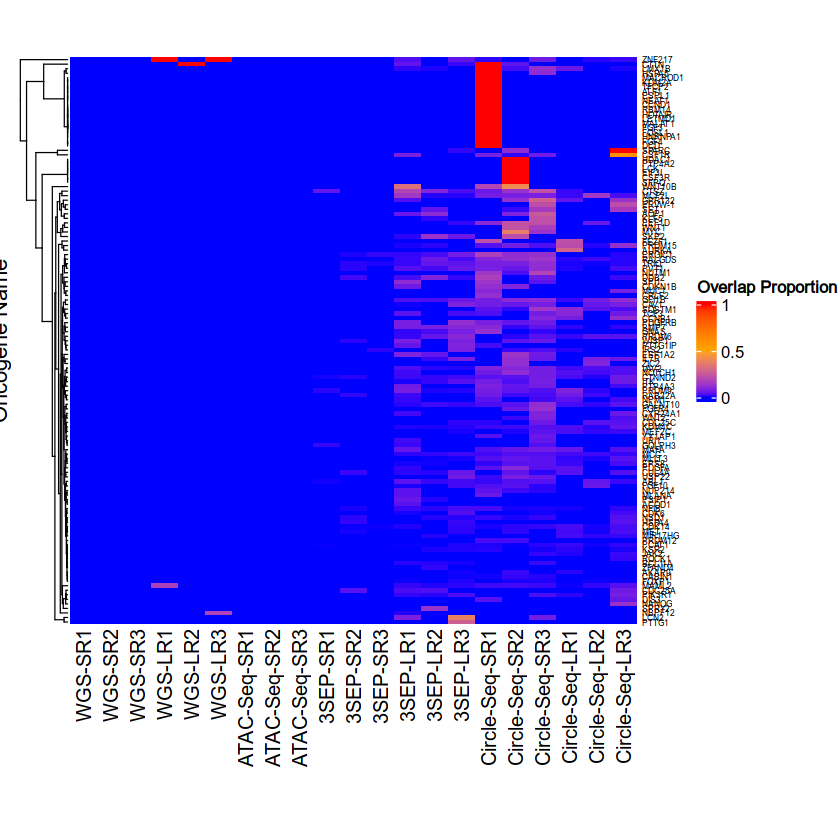

In [27]:
col_fun = circlize::colorRamp2(c(0, 0.5, 1), c("blue", "orange", "red"))
suppressMessages({Heatmap(expanded_mat, name = "Overlap Proportion", col = col_fun,
        row_title = "Oncogene Name", row_names_gp = gpar(fontsize = 5), column_order = match(column_order, colnames(expanded_mat)),width = unit(12, "cm"), height = unit(12, "cm"))})

In [28]:
#pdf("/home/qukun/luosongwen/workspace/eccDNA/oncogenes/final_oncogenes_heatmap.pdf", width = 18, height = 25, family = "ArialMT")
#col_fun = circlize::colorRamp2(c(0, 0.5, 1), c("blue", "orange", "red"))
#suppressMessages({Heatmap(expanded_mat, name = "Overlap Proportion", col = col_fun,
        #row_title = "Oncogene Name", row_names_gp = gpar(fontsize = 5), column_order = match(column_order, colnames(expanded_mat)),width = unit(12, "cm"), height = unit(12, "cm"))})
#dev.off()